In [2]:
# Partial dependence plots can be interpreted similarly to the coefficients in linear regression models. 
# They show how each variable or predictor affects the model's predictions.
# Can use plots to show the relationship, according to our model, between Price and a couple variables from 
# the Melbourne Housing dataset. 

In [8]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

In [4]:
cols_to_use = ['Distance', 'Landsize', 'BuildingArea']

In [5]:
def get_some_data():
    data = pd.read_csv('melb_data.csv')
    y = data.Price
    X = data[cols_to_use]
    my_imputer = Imputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X, y

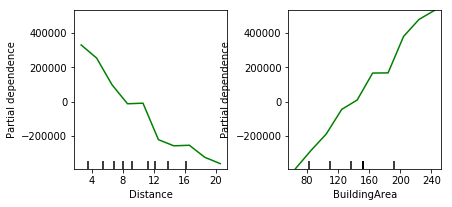

In [12]:
X, y = get_some_data()  # find features and target variables
my_model = GradientBoostingRegressor()
my_model.fit(X, y) # fit model 
# plot partial dependence 
my_plots = plot_partial_dependence(my_model, 
                                   features=[0,2], 
                                   X=X, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=10)

In [13]:
# The left plot shows the partial dependence between our target, Sales Price, and the distance variable.
# The right plot shows the partial dependence between our target, Sales Price, and the BuildingArea variable.

In [14]:
# In the left graph, we see house prices fall as we get further from the central business distract. Though there seems to be a nice suburb about 16 kilometers out, 
# where home prices are higher than many nearer and further suburbs.

In [15]:
# another set of plots using the data titanic_data.csv

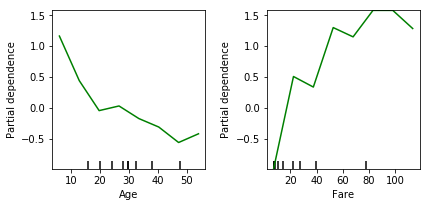

In [18]:
# import data from .csv file
titanic_data = pd.read_csv('titanic_train.csv')
# set target 
titanic_y = titanic_data.Survived
# using GradientBoostingClassifier model
clf = GradientBoostingClassifier()
# set features, use only 3 columns.
titanic_X_colns = ['PassengerId','Age', 'Fare',]
titanic_X = titanic_data[titanic_X_colns]
# want to change null data to average value using imputer, instead of just removing the missing data. 
my_imputer = Imputer()
imputed_titanic_X = my_imputer.fit_transform(titanic_X)
# fit the model
clf.fit(imputed_titanic_X, titanic_y)
# partial dependence plots
titanic_plots = plot_partial_dependence(clf, features=[1,2], X=imputed_titanic_X, 
                                        feature_names=titanic_X_colns, grid_resolution=8)

In [19]:
# Conclusion:
# - Being young increased your odds of survival. (Consistent with historical recountings that they got women 
# and children off the Titanic first.)
# - People who paid more had better odds of survival. 
# (higher fares got you a cabin that was closer to the top of the boat, and may have given you better odds 
# of getting a life-boat.)